In [1]:
# Import required libraries
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re
import nltk
import numpy as np

In [2]:
# Ensure necessary NLTK data is available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:

# Load 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

In [4]:
# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W', ' ', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

processed_docs = [preprocess_text(doc) for doc in documents]

In [17]:
# Number of topics
num_topics = lda_model.num_topics

# Number of words to display per topic
num_words = 10

# Extracting and printing the top words for each topic
print("List of Words in Each Topic Discovered by LDA:")

for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=num_words):
    print(f"\nTopic {idx+1}:")
    # Extract words from topic
    words = topic.split(' + ')
    for word in words:
        # Format: probability*"word"
        prob_word = word.split('*')
        print(prob_word[1].replace('"', '').strip())


List of Words in Each Topic Discovered by LDA:

Topic 1:
ax
_
p
q
r
w
g
u
b
n

Topic 2:
edu
com
organization
subject
lines
writes
article
posting
nntp
host

Topic 3:
edu
one
would
god
people
com
subject
writes
lines
organization

Topic 4:
people
government
one
would
israel
said
us
president
q
first

Topic 5:
edu
x
subject
lines
organization
com
use
one
windows
university


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Topic Modeling with LDA
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(processed_docs)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [6]:
# Print topics
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}: ", [(words[i], topic[i].round(2)) for i in topic.argsort()[:-top_n - 1:-1]])

print_topics(lda, vectorizer)


Topic 0:  [('edu', 10035.06), ('com', 3943.55), ('university', 3793.5), ('posting', 3234.45), ('host', 3151.48), ('nntp', 3090.9), ('ca', 2752.02), ('writes', 2667.22), ('like', 2653.87), ('article', 2553.55)]
Topic 1:  [('edu', 7385.6), ('com', 2992.11), ('writes', 2586.25), ('article', 2519.04), ('university', 1422.12), ('apr', 1398.95), ('year', 1370.67), ('posting', 1201.43), ('team', 1187.21), ('cs', 1179.36)]
Topic 2:  [('people', 7638.58), ('edu', 7287.81), ('god', 5053.22), ('think', 4548.18), ('writes', 4333.24), ('like', 3975.02), ('know', 3714.48), ('com', 3612.98), ('article', 3584.92), ('say', 3388.73)]
Topic 3:  [('edu', 10972.57), ('com', 9949.75), ('writes', 3757.97), ('article', 3618.24), ('posting', 3310.81), ('host', 3078.06), ('file', 2923.9), ('nntp', 2874.3), ('use', 2396.25), ('like', 2210.72)]
Topic 4:  [('ax', 62522.2), ('max', 4790.91), ('gv', 1321.19), ('bf', 1228.75), ('pl', 1007.72), ('di', 720.18), ('tm', 564.61), ('ei', 497.73), ('bhj', 470.35), ('giz', 4

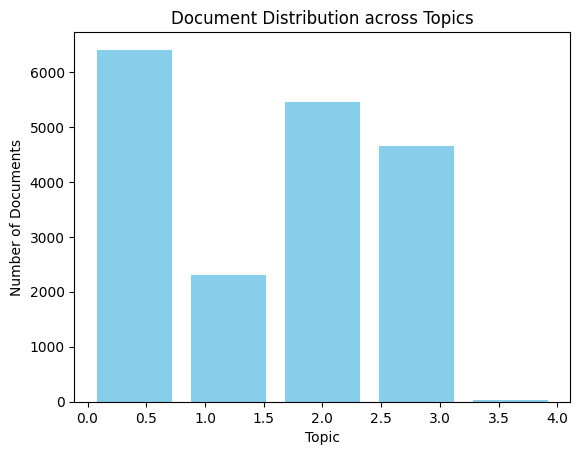

In [7]:
# Visualize topic distribution
topic_distribution = lda.transform(doc_term_matrix)
plt.hist(topic_distribution.argmax(axis=1), bins=lda.n_components, color='skyblue', rwidth=0.8)
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Document Distribution across Topics')
plt.show()

In [8]:
# Generate Word Embeddings with Word2Vec
word2vec_model = Word2Vec([doc.split() for doc in processed_docs], vector_size=100, window=5, min_count=2, sg=1)

In [10]:
# Compute document embeddings by averaging word embeddings
def document_vector(doc):
    return np.mean([word2vec_model.wv[word] for word in doc.split() if word in word2vec_model.wv], axis=0)

doc_embeddings = np.array([document_vector(doc) for doc in processed_docs])

In [11]:
# Document Similarity using Cosine Similarity
similarity_matrix = cosine_similarity(doc_embeddings)

In [13]:
# Clustering documents using KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Explicitly setting n_init
kmeans.fit(doc_embeddings)
labels = kmeans.labels_

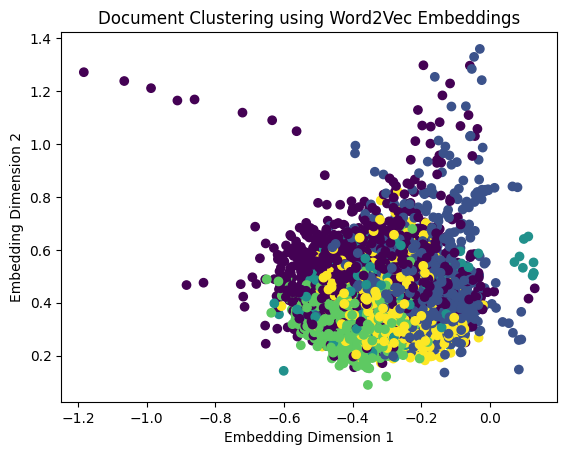

In [14]:
# Visualize clusters (optional visualization step)
plt.scatter(doc_embeddings[:, 0], doc_embeddings[:, 1], c=labels, cmap='viridis')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.title('Document Clustering using Word2Vec Embeddings')
plt.show()

In [15]:
pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.4 MB/s eta 0:00:00


In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
documents = newsgroups.data

# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W', ' ', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

processed_docs = [preprocess_text(doc) for doc in documents]

# Create a dictionary and corpus for gensim
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(text) for text in processed_docs]

# LDA model using gensim
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Prepare the visualization with pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Display the visualization
pyLDAvis.display(lda_display)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
